In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from IPython.core.display import display, HTML

In [3]:
attendance_valuation_elo_df = pd.read_csv("/Users/nishigandha/Downloads/social-power-nba/nba_2017_att_val_elo.csv");attendance_valuation_elo_df.head()

,Unnamed: 0,TEAM,GMS,TOTAL,AVG,PCT,VALUE_MILLIONS,ELO,CONF
0,0,Chicago Bulls,41,888882,21680,103.6,2500.0,1519,East
1,1,Dallas Mavericks,41,811366,19789,103.1,1450.0,1420,West
2,2,Sacramento Kings,41,721928,17608,100.6,1075.0,1393,West
3,3,Miami Heat,41,805400,19643,100.2,1350.0,1569,East
4,4,Toronto Raptors,41,813050,19830,100.2,1125.0,1600,East


In [4]:
salary_df = pd.read_csv("/Users/nishigandha/Downloads/social-power-nba/nba_2017_salary.csv");salary_df.head()

,NAME,POSITION,TEAM,SALARY
0,LeBron James,SF,Cleveland Cavaliers,30963450.0
1,Mike Conley,PG,Memphis Grizzlies,26540100.0
2,Al Horford,C,Boston Celtics,26540100.0
3,Dirk Nowitzki,PF,Dallas Mavericks,25000000.0
4,Carmelo Anthony,SF,New York Knicks,24559380.0


In [ ]:
mean_salary_df = salary_df.groupby(["TEAM"], as_index= False).mean().merge(attendance_valuation_elo_df, how="inner", on="TEAM")
mean_salary_df.head()

In [5]:
pie_df = pd.read_csv("/Users/nishigandha/Downloads/social-power-nba/nba_2017_pie.csv");pie_df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,...,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE
0,Russell Westbrook,OKC,28,81,46,35,34.6,107.9,104.6,3.3,...,23.4,5.3,27.9,16.7,12.2,47.6,55.4,40.8,102.31,23.0
1,Boban Marjanovic,DET,28,35,16,19,8.4,104.3,102.4,1.9,...,5.1,16.6,31.3,23.9,5.7,54.5,60.6,24.8,97.20,19.6
2,Demetrius Jackson,BOS,22,5,1,4,3.4,124.2,117.8,6.3,...,31.1,9.1,11.8,10.3,0.0,87.5,75.3,17.2,87.46,19.4
3,Anthony Davis,NOP,24,75,31,44,36.1,104.2,102.5,1.7,...,7.3,6.7,26.9,17.0,8.4,51.8,58.0,32.6,100.19,19.2
4,James Harden,HOU,27,81,54,27,36.4,113.6,107.3,6.3,...,27.6,3.5,21.2,12.3,14.1,52.5,61.3,34.1,102.98,19.0


In [6]:
plus_minus_df = pd.read_csv("/Users/nishigandha/Downloads/social-power-nba/nba_2017_real_plus_minus.csv");plus_minus_df.head()

,NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS
0,"LeBron James, SF",CLE,74,37.8,6.49,1.93,8.42,20.43
1,"Stephen Curry, PG",GS,79,33.4,7.27,0.14,7.41,18.80
2,"Jimmy Butler, SG",CHI,76,37.0,4.82,1.80,6.62,17.35
3,"Russell Westbrook, PG",OKC,81,34.6,6.74,-0.47,6.27,17.34
4,"Draymond Green, PF",GS,76,32.5,1.55,5.59,7.14,16.84


In [7]:
br_stats_df = pd.read_csv("/Users/nishigandha/Downloads/social-power-nba/nba_2017_br.csv");br_stats_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,...,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6
1,2,James Harden,PG,27,HOU,81,81,36.4,8.3,18.9,...,0.847,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1
2,3,Isaiah Thomas,PG,27,BOS,76,76,33.8,9.0,19.4,...,0.909,0.6,2.1,2.7,5.9,0.9,0.2,2.8,2.2,28.9
3,4,Anthony Davis,C,23,NOP,75,75,36.1,10.3,20.3,...,0.802,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0
4,5,DeMar DeRozan,SG,27,TOR,74,74,35.4,9.7,20.9,...,0.842,0.9,4.3,5.2,3.9,1.1,0.2,2.4,1.8,27.3


In [8]:
plus_minus_df.rename(columns={"NAME":"PLAYER", "WINS": "WINS_RPM"}, inplace=True)
players = []
for player in plus_minus_df["PLAYER"]:
    plyr, _ = player.split(",")
    players.append(plyr)
plus_minus_df.drop(["PLAYER"], inplace=True, axis=1)
plus_minus_df["PLAYER"] = players
plus_minus_df.head()

,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PLAYER
0,CLE,74,37.8,6.49,1.93,8.42,20.43,LeBron James
1,GS,79,33.4,7.27,0.14,7.41,18.80,Stephen Curry
2,CHI,76,37.0,4.82,1.80,6.62,17.35,Jimmy Butler
3,OKC,81,34.6,6.74,-0.47,6.27,17.34,Russell Westbrook
4,GS,76,32.5,1.55,5.59,7.14,16.84,Draymond Green


In [13]:
nba_players_df = br_stats_df.copy()
nba_players_df.rename(columns={'Player': 'PLAYER','Pos':'POSITION', 'Tm': "TEAM", 'Age': 'AGE', "PS/G": "POINTS"}, inplace=True)
nba_players_df.drop(["G", "GS", "TEAM"], inplace=True, axis=1)
nba_players_df = nba_players_df.merge(plus_minus_df, how="inner", on="PLAYER")
nba_players_df.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,TOV,PF,POINTS,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,5.4,2.3,31.6,OKC,81,34.6,6.74,-0.47,6.27,17.34
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,5.7,2.7,29.1,HOU,81,36.4,6.38,-1.57,4.81,15.54
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,2.8,2.2,28.9,BOS,76,33.8,5.72,-3.89,1.83,8.19
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,2.4,2.2,28.0,NO,75,36.1,0.45,3.90,4.35,12.81
4,5,DeMar DeRozan,SG,27,35.4,9.7,20.9,0.467,0.4,1.7,...,2.4,1.8,27.3,TOR,74,35.4,2.21,-2.04,0.17,5.46


In [14]:
pie_df_subset = pie_df[["PLAYER", "PIE", "PACE", "W"]].copy()
nba_players_df = nba_players_df.merge(pie_df_subset, how="inner", on="PLAYER")
nba_players_df.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,OKC,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,HOU,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,BOS,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,NO,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31
4,5,DeMar DeRozan,SG,27,35.4,9.7,20.9,0.467,0.4,1.7,...,TOR,74,35.4,2.21,-2.04,0.17,5.46,15.5,97.69,47


In [42]:
salary_df.rename(columns={'NAME': 'PLAYER'}, inplace=True)
salary_df["SALARY_MILLIONS"] = round(salary_df["SALARY"]/1000000, 2)
salary_df.drop(["POSITION", "TEAM", "SALARY"], inplace=True, axis=1)
salary_df.head()

,PLAYER,SALARY_MILLIONS
0,LeBron James,30.96
1,Mike Conley,26.54
2,Al Horford,26.54
3,Dirk Nowitzki,25.00
4,Carmelo Anthony,24.56


In [43]:
diff = list(set(nba_players_df["PLAYER"].values.tolist()) - set(salary_df["PLAYER"].values.tolist()))

In [44]:
nba_players_with_salary_df = nba_players_df.merge(salary_df); 

In [45]:
wiki_df = pd.read_csv("/Users/nishigandha/Downloads/social-power-nba/nba_2017_player_wikipedia.csv")
wiki_df.head()

,Unnamed: 0,names,pageviews,timestamps,wikipedia_handles
0,0,Russell Westbrook,3400,2016010100,Russell_Westbrook
1,1,Russell Westbrook,2893,2016010200,Russell_Westbrook
2,2,Russell Westbrook,3209,2016010300,Russell_Westbrook
3,3,Russell Westbrook,2531,2016010400,Russell_Westbrook
4,4,Russell Westbrook,2599,2016010500,Russell_Westbrook


In [46]:
wiki_df.rename(columns={'names': 'PLAYER', "pageviews": "PAGEVIEWS"}, inplace=True)

In [47]:
median_wiki_df = wiki_df.groupby("PLAYER").median()

In [48]:
median_wiki_df_small = median_wiki_df[["PAGEVIEWS"]]

In [49]:
median_wiki_df_small = median_wiki_df_small.reset_index()

In [50]:
nba_players_with_salary_wiki_df = nba_players_with_salary_df.merge(median_wiki_df_small)

In [51]:
twitter_df = pd.read_csv("/Users/nishigandha/Downloads/social-power-nba/nba_2017_twitter_players.csv");twitter_df.head()

,PLAYER,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,Russell Westbrook,2130.5,559.0
1,James Harden,969.0,321.5
2,Isaiah Thomas,467.5,155.5
3,Anthony Davis,368.0,104.0
4,DeMar DeRozan,0.0,186.0


In [52]:
nba_players_with_salary_wiki_twitter_df = nba_players_with_salary_wiki_df.merge(twitter_df)

In [53]:
nba_players_with_salary_wiki_twitter_df.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,7.7,...,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0


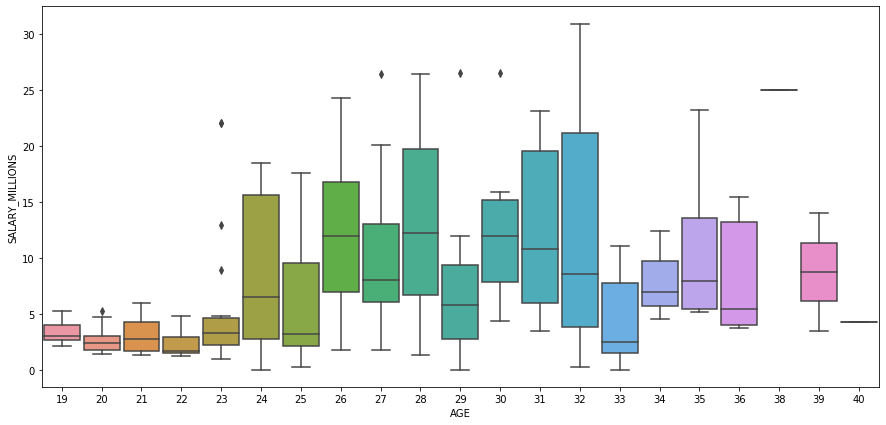

In [54]:
fig = plt.subplots(figsize= (15, 7))
ax = sns.boxplot(y= "SALARY_MILLIONS" , x="AGE", data = nba_players_with_salary_wiki_twitter_df, orient="Vertical", width= 0.9)

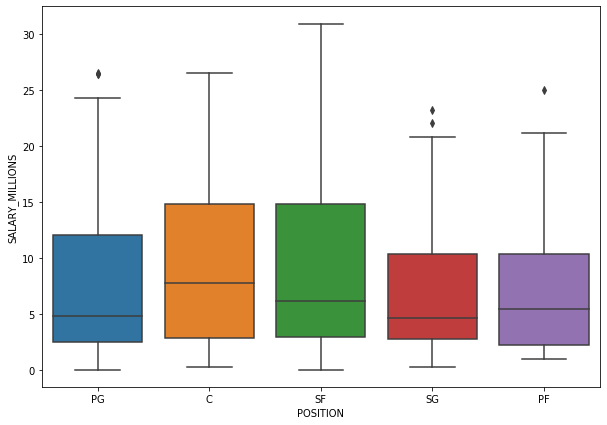

In [55]:
plt.subplots(figsize= (10, 7))
sns.boxplot(y= "SALARY_MILLIONS" , x="POSITION", data = nba_players_with_salary_wiki_twitter_df, orient="Vertical")

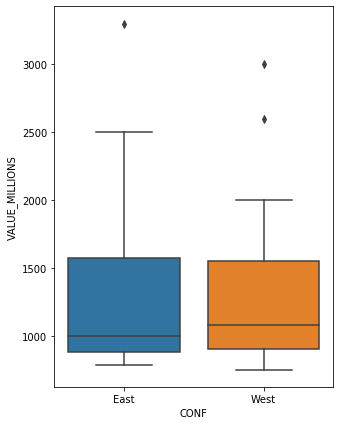

In [56]:
plt.subplots(figsize= (5, 7))
sns.boxplot(y= "VALUE_MILLIONS" , x="CONF", data = attendance_valuation_elo_df, orient="Vertical")